# Deep Learning for OR and FE
## Assignment 1
### Louis Francois (ljf2137) & Quentin Glangetas (qag200)
## Problem 2 (Linear Classification Utilizing Hidden Layer)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  
from scipy.optimize import minimize
import time
import os

matplotlib.style.use('seaborn')

In [2]:
np.random.seed(1000)

### Data

In [3]:
X,Y = np.meshgrid(np.arange(-2,2,0.05),np.arange(-1,1,0.05));
n1 = X.shape[0]
n2 = X.shape[1]
x = np.arange(-2,2,0.05)
y1 = -0.6*np.sin(3*x+np.pi/2)-0.2
y2 = -0.6*np.sin(3*x+np.pi/2)+0.2

Text(0.5, 1.0, 'Linear Classfication Example Tanh Hidden Layer')

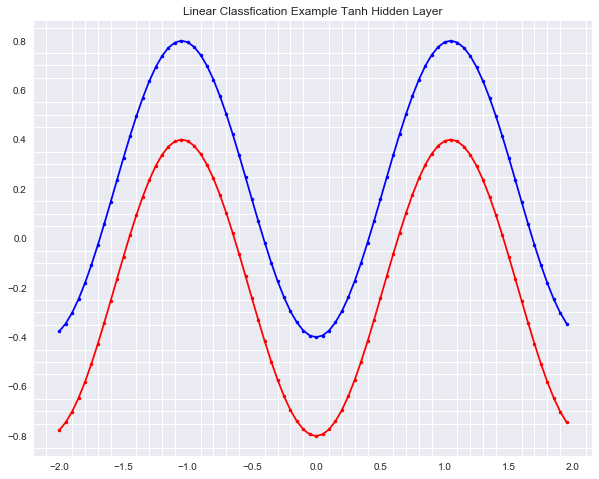

In [4]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
plt.grid(which='both')
plt.plot(x, y1, 'r.-')
plt.plot(x, y2, 'b.-')
plt.title('Linear Classfication Example Tanh Hidden Layer')

### Optimization

(a) We use a gradient-based (gradient descent) optimization routine to find the optimal parameter set.

In [5]:
# We define the objective function (with hidden layer)
def objFunc2(params, X, Y, x, y1, y2, dummy):
    
    a, b, c, w11, w12, w21, w22, b1, b2 = params

    mae = 0
    
    xHat = np.tanh(w11*X + w21*Y + b1)
    yHat = np.tanh(w12*X + w22*Y + b2)
    
    xHat1 = np.tanh(w11*x + w21*y1 + b1)
    yHat1 = np.tanh(w12*x + w22*y1 + b2)
    
    xHat2 = np.tanh(w11*x + w21*y2 + b1)
    yHat2 = np.tanh(w12*x + w22*y2 + b2)
    
    # for y2 t = 1
    e = +1*(a*xHat2 + b*yHat2 + c)/np.sqrt(a**2+b**2)
    mae = mae - np.sum(e[e<0])
    
    # for y1 t = -1
    e = -1*(a*xHat1 + b*yHat1 + c)/np.sqrt(a**2+b**2)
    mae = mae - np.sum(e[e<0])

    return mae

In [6]:
# starting point
tol = 1e-10

a  = -3
b = 2
c = 7
w11 = 10
w12 = 4
w21 = 3
w22 = -2
b1  = 2
b2  = 1
params =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

dummy=time.time()

# optimization using scipy.optimize.minimize with the loss function defined above
# scipy.optimize.minimize applies a gradient descent method by default 
res = minimize(objFunc2, params, args=(X, Y, x, y1, y2, dummy), tol=tol, options={'disp': True, 'maxiter':500})
print(res.x)

         Current function value: 0.000006
         Iterations: 38
         Function evaluations: 1772
         Gradient evaluations: 160
[-3.32458552e+00  3.32458539e+00  6.56032201e-08  7.23705930e+00
  9.37499102e+00 -2.81894230e+00 -5.18381252e-01  3.07232939e+00
  4.20270968e+00]


In [7]:
a, b, c, w11, w12, w21, w22, b1, b2 = res.x
xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)

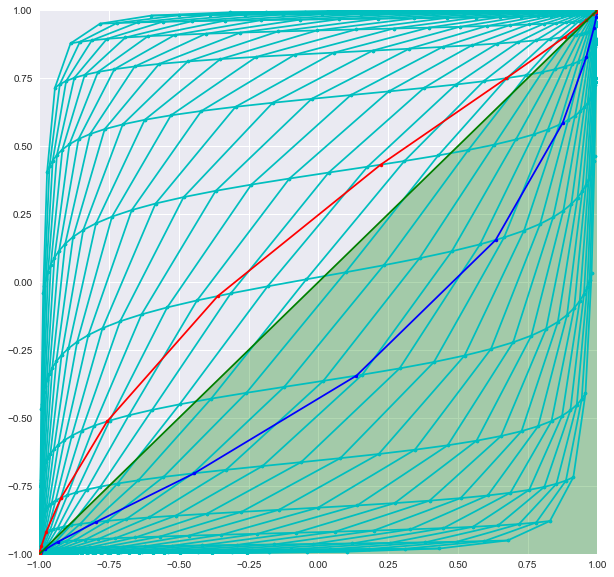

In [8]:
# we plot the transformed curves and the line ax + by + c = 0 in the corresponding space presentation ax + by + c = 0
# through the transformed data without crossing any of the transformed curves.
plt.figure(figsize=(10,10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-c-a*x)/b, 'g-')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

(b) We do this again using various different starting points for the parameter set.

In [9]:
# starting point
tol = 1e-10

a  = -6
b = 1
c = 8
w11 = 10
w12 = -10
w21 = 8
w22 = -3
b1  = 2
b2  = 1
params =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

dummy=time.time()

# optimization using scipy.optimize.minimize with the loss function defined above
# scipy.optimize.minimize applies a gradient descent method by default 
res = minimize(objFunc2, params, args=(X, Y, x, y1, y2, dummy), tol=tol, options={'disp': True, 'maxiter':500})
print(res.x)

         Current function value: 0.001760
         Iterations: 24
         Function evaluations: 1662
         Gradient evaluations: 150
[-1.87567875e+01 -1.87567658e+01  2.16972847e-05  1.61543649e+01
 -1.01378597e+01  5.06667740e-01 -4.98824595e+00 -1.25271224e+00
 -1.39860816e+00]


In [10]:
a, b, c, w11, w12, w21, w22, b1, b2 = res.x
xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)

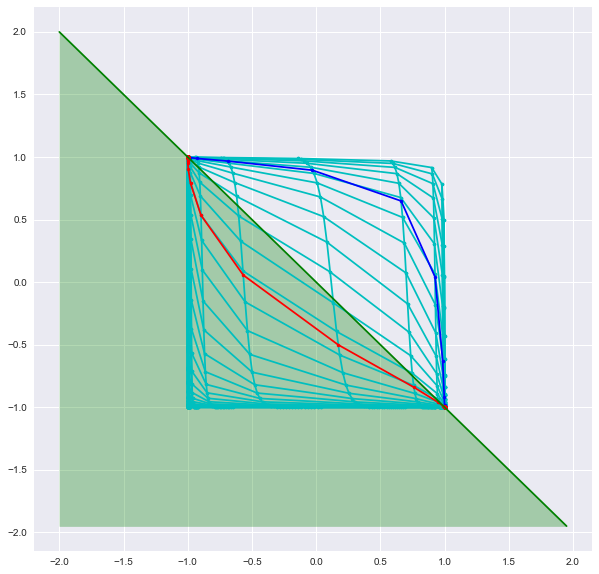

In [11]:
# we plot the transformed curves and the line ax + by + c = 0 in the corresponding space presentation 
plt.figure(figsize=(10,10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-c-a*x)/b, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

We cannot find a solution to the problem with this starting point. The next starting points used give much better results, but we had to try a lot of different starting points before finding them.

In [12]:
# starting point
tol = 1e-10

a  = -4
b = 3
c = 5
w11 = 9
w12 = -5
w21 = 6
w22 = -3
b1  = 1
b2  = 2
params =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

dummy=time.time()

# optimization using scipy.optimize.minimize with the loss function defined above
# scipy.optimize.minimize applies a gradient descent method by default 
res = minimize(objFunc2, params, args=(X, Y, x, y1, y2, dummy), tol=tol, options={'disp': True, 'maxiter':500})
print(res.x)

         Current function value: 0.000011
         Iterations: 40
         Function evaluations: 1791
         Gradient evaluations: 162
[-3.05938188e+01 -3.05938189e+01 -1.47574305e-06  1.42543220e+01
 -3.12962887e+01 -1.62309433e+01  8.71875274e+00  6.45012213e+00
 -1.67912643e+01]


In [13]:
a, b, c, w11, w12, w21, w22, b1, b2 = res.x
xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)

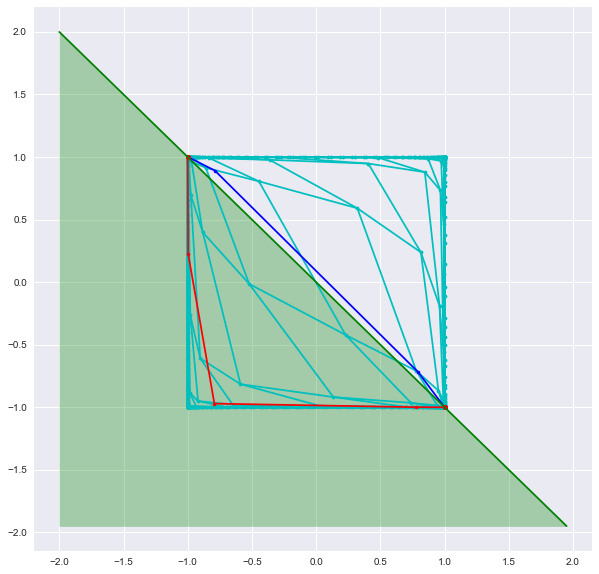

In [14]:
# we plot the transformed curves and the line ax + by + c = 0 in the corresponding space presentation 
plt.figure(figsize=(10,10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-c-a*x)/b, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

In [15]:
# starting point
tol = 1e-10

a  = -4
b = 3
c = 5
w11 = 8
w12 = -5
w21 = 7
w22 = -3
b1  = 1
b2  = 2
params =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

dummy=time.time()

# optimization using scipy.optimize.minimize with the loss function defined above
# scipy.optimize.minimize applies a gradient descent method by default 
res = minimize(objFunc2, params, args=(X, Y, x, y1, y2, dummy), tol=tol, options={'disp': True, 'maxiter':500})
print(res.x)

         Current function value: 0.000585
         Iterations: 20
         Function evaluations: 877
         Gradient evaluations: 79
[-4.84959238e+01 -4.84948930e+01 -7.55462717e-04  1.66211845e+01
 -5.29749690e+01 -1.35125184e+01  5.12217807e-01 -2.59204571e+00
 -1.30700625e+01]


In [16]:
a, b, c, w11, w12, w21, w22, b1, b2 = res.x
xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)

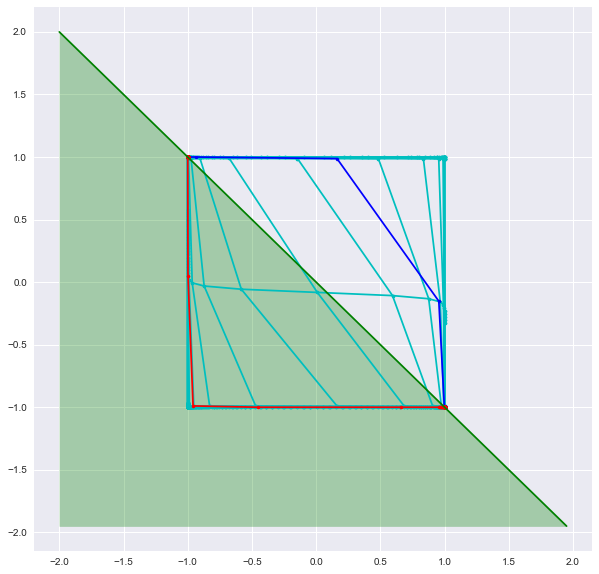

In [17]:
# we plot the transformed curves and the line ax + by + c = 0 in the corresponding space presentation 
plt.figure(figsize=(10,10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-c-a*x)/b, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

(c) We now use a different objective function.

In [18]:
# We define the hinge loss function 
def hinge(params, X, Y, x, y1, y2, dummy):
    
    a, b, c, w11, w12, w21, w22, b1, b2 = params

    loss = 0
    
    xHat = np.tanh(w11*X + w21*Y + b1)
    yHat = np.tanh(w12*X + w22*Y + b2)
    
    xHat1 = np.tanh(w11*x + w21*y1 + b1)
    yHat1 = np.tanh(w12*x + w22*y1 + b2)
    
    xHat2 = np.tanh(w11*x + w21*y2 + b1)
    yHat2 = np.tanh(w12*x + w22*y2 + b2)
    
    # for y2 t = 1
    e = +1*(a*xHat2 + b*yHat2 + c)
    for k in e:
        loss += max(0,1-k)
    
    # for y1 t = -1
    e = -1*(a*xHat1 + b*yHat1 + c)
    for k in e:
        loss += max(0,1-k)
    
    return loss

We run the same optimization routine as before, but this time using the hinge loss function. We use the same starting point we last used with the other objective function.

In [19]:
# starting point
tol = 1e-10

a  = -4
b = 3
c = 5
w11 = 8
w12 = -5
w21 = 7
w22 = -3
b1  = 1
b2  = 2
params =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

dummy=time.time()

# optimization using scipy.optimize.minimize with the hinge loss function defined above
# scipy.optimize.minimize applies a gradient descent method by default 
res = minimize(hinge, params, args=(X, Y, x, y1, y2, dummy), tol=tol, options={'disp': True, 'maxiter':500})
print(res.x)

         Current function value: 150.640210
         Iterations: 10
         Function evaluations: 2234
         Gradient evaluations: 202
[  6.43355734   3.0242862   -2.40927113   5.04060804  -2.90963296
   8.44270663   1.2433929   14.47722558 -18.78518396]


In [20]:
a, b, c, w11, w12, w21, w22, b1, b2 = res.x
xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)

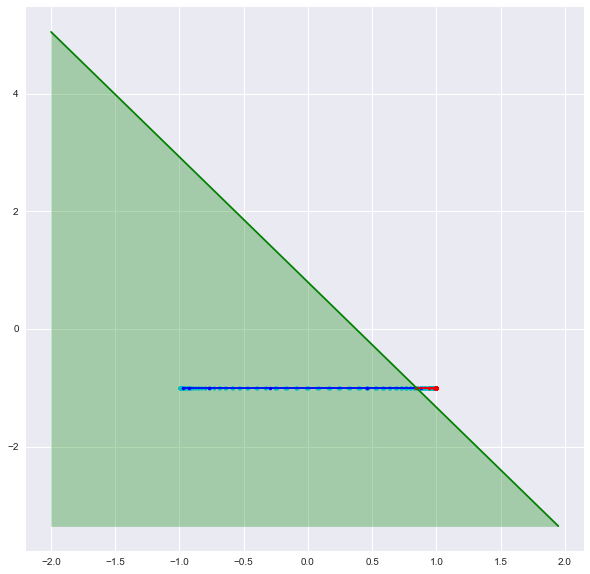

In [21]:
# we plot the transformed curves and the line ax + by + c = 0 in the corresponding space presentation 
plt.figure(figsize=(10,10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-c-a*x)/b, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

We try with another starting point, for which the optimization routine yields better results (although the set of parameters obtained is still not a solution of our problem).

In [22]:
# starting point
tol = 1e-10

a  = 1
b = 2
c = 3
w11 = -11
w12 = 15
w21 = -4
w22 = -10
b1  = 1
b2  = 1
params =  np.array([a, b, c, w11, w12, w21, w22, b1, b2])

dummy=time.time()

# optimization using scipy.optimize.minimize with the hinge loss function defined above
# scipy.optimize.minimize applies a gradient descent method by default 
res = minimize(hinge, params, args=(X, Y, x, y1, y2, dummy), tol=tol, options={'disp': True, 'maxiter':500})
print(res.x)

         Current function value: 102.068849
         Iterations: 36
         Function evaluations: 1535
         Gradient evaluations: 139
[-2.75942475e+00 -3.75947406e+00 -1.57660574e-04 -2.98322228e+01
  3.02024745e+01  6.27280142e+00 -2.92804508e+01  4.76985492e+00
 -1.41881727e+01]


In [23]:
a, b, c, w11, w12, w21, w22, b1, b2 = res.x
xHat = np.tanh(w11*X + w21*Y + b1)
yHat = np.tanh(w12*X + w22*Y + b2)
xHat1 = np.tanh(w11*x + w21*y1 + b1)
yHat1 = np.tanh(w12*x + w22*y1 + b2)
xHat2 = np.tanh(w11*x + w21*y2 + b1)
yHat2 = np.tanh(w12*x + w22*y2 + b2)

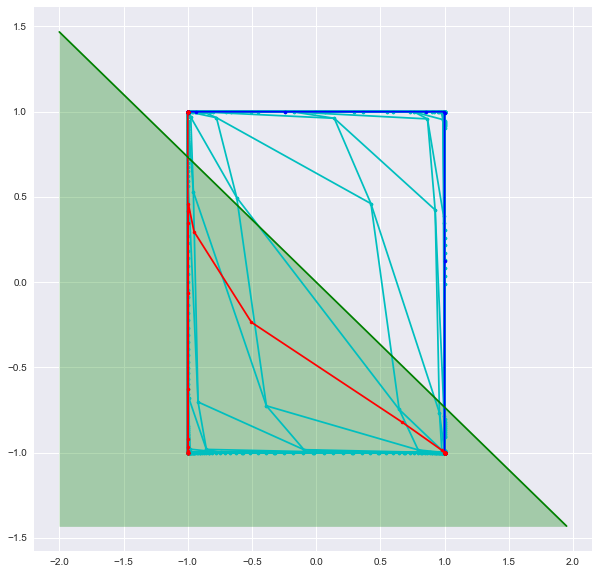

In [24]:
# we plot the transformed curves and the line ax + by + c = 0 in the corresponding space presentation 
plt.figure(figsize=(10,10))
for i in np.arange(n1):
    plt.plot(xHat[i,:],yHat[i,:], 'c.-')
for i in np.arange(n2):
    plt.plot(xHat[:,i],yHat[:,i], 'c.-')
plt.plot(xHat1,yHat1,'b.-')
plt.plot(xHat2,yHat2,'r.-')
plt.plot(x, (-c-a*x)/b, 'g-')
plt.fill_between(x,np.min([-1, np.min(yHat1),np.min((-c-a*x)/b)]),(-c-a*x)/b,color='g',alpha=0.3)

(d) We saw that the problem is very sensitive to the starting point, with the gradient-based optimization routine giving very different solutions to the problem depending on the the starting point (for both of the objective functions used). Moreover, we saw that we obtained much better results with the objective function given in class (defined as "objFunc2" here) than with the hinge loss function, for which the optimization routine did not return a correct solution for any of the starting points we tried to use.